## 1.1 exploring the lecture.csv

我们已经成功读取了第三份文件 `lectures.csv`。以下是详细的数据结构分析结果：

---

## 📄 一、数据概览

* **总记录数**：418 条
* **字段数**：4 个
* **缺失值情况**：无任何缺失，字段完整。

---

## 📊 二、字段说明

| 字段名          | 类型     | 含义描述                                          |
| ------------ | ------ | --------------------------------------------- |
| `lecture_id` | int64  | 每个讲座的唯一编号（用于匹配 `content_id`）                  |
| `tag`        | int64  | 知识点标签，类似于 questions.csv 中的标签                  |
| `part`       | int64  | 所属课程部分（与 questions 表结构一致）                     |
| `type_of`    | object | 讲座的类型（如 concept、intention、solving question 等） |

---

## 🔍 三、可以探索的有效维度（并说明建模意义）

| 维度                | 可做探索                                | 对建模的作用                                 |
| ----------------- | ----------------------------------- | -------------------------------------- |
| 🎓 讲座类型分布         | `type_of` 不同类型讲座的数量和占比              | 可用于内容推荐系统，理解用户偏好（例如推荐更多解题类讲座）          |
| 🧩 标签分布           | `tag` 分布是否均匀？是否与题库共用？               | 可与 `questions.csv` 关联，构造“讲座-题目-知识点”的桥梁 |
| 📚 课程 part 分布     | 每个课程部分有多少讲座                         | 评估教学资源是否均衡、为 part 构建内容 embedding 提供支持  |
| 🔗 content\_id 匹配 | 与答题数据中 `content_type_id == 1` 的记录对齐 | 便于结合 `train.csv` 追踪用户是否看过哪些讲座（可转为特征）   |



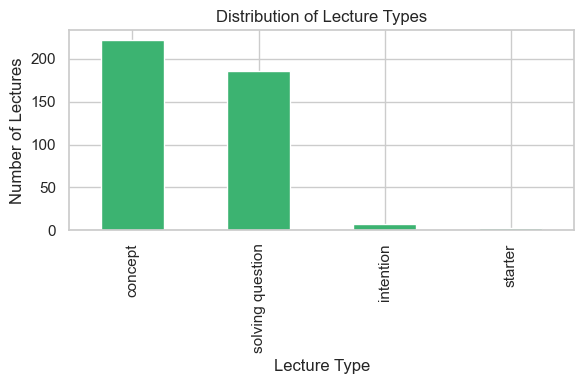

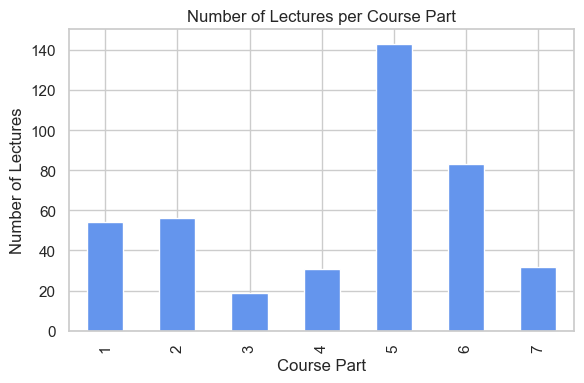

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
lectures_df = pd.read_csv("riiid-test-answer-prediction/lectures.csv")

import matplotlib.pyplot as plt

# 1. 讲座类型分布
type_counts = lectures_df['type_of'].value_counts()
plt.figure(figsize=(6,4))
type_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Lecture Types')
plt.xlabel('Lecture Type')
plt.ylabel('Number of Lectures')
plt.tight_layout()
plt.show()

# 2. part 分布
part_counts = lectures_df['part'].value_counts().sort_index()
plt.figure(figsize=(6,4))
part_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Number of Lectures per Course Part')
plt.xlabel('Course Part')
plt.ylabel('Number of Lectures')
plt.tight_layout()
plt.show()


/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_16298/776635974.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=part_counts.index, y=part_counts.values, ax=axes[0], palette="Blues_d")
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_16298/776635974.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, ax=axes[1], palette="Greens_d")
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_16298/776635974.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15)
/var/folders/qv/v

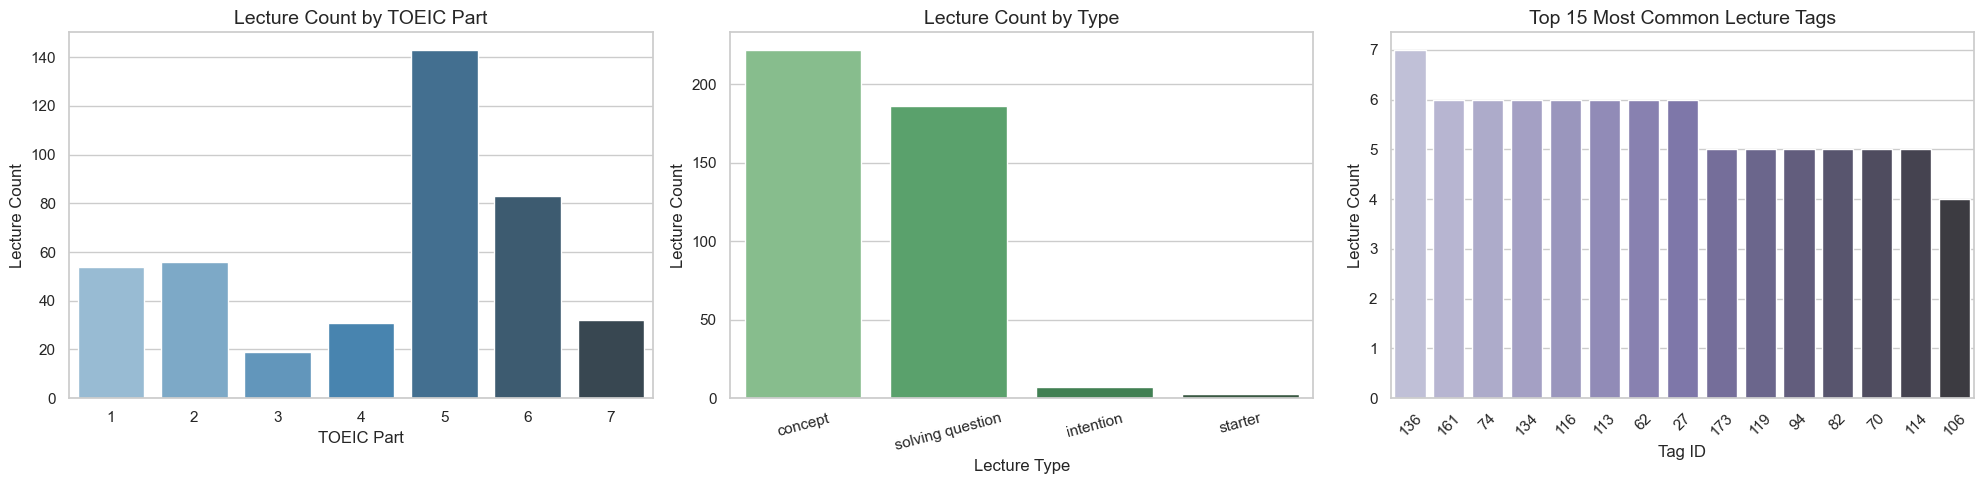

In [ ]:

# 设置美观的绘图风格和配色
sns.set(style="whitegrid", palette="pastel")

# 统计分布
part_counts = lectures_df['part'].value_counts().sort_index()
type_counts = lectures_df['type_of'].value_counts()
tag_counts = lectures_df['tag'].value_counts().sort_values(ascending=False)

# 创建图形
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 图1：TOEIC考试各部分的讲座数量分布
sns.barplot(x=part_counts.index, y=part_counts.values, ax=axes[0], palette="Blues_d")
axes[0].set_title("Lecture Count by TOEIC Part", fontsize=14)
axes[0].set_xlabel("TOEIC Part")
axes[0].set_ylabel("Lecture Count")

# 图2：讲座类型分布
sns.barplot(x=type_counts.index, y=type_counts.values, ax=axes[1], palette="Greens_d")
axes[1].set_title("Lecture Count by Type", fontsize=14)
axes[1].set_xlabel("Lecture Type")
axes[1].set_ylabel("Lecture Count")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15)

# 图3：前15个最常见的标签
top_tags = tag_counts.head(15)
sns.barplot(x=top_tags.index.astype(str), y=top_tags.values, ax=axes[2], palette="Purples_d")
axes[2].set_title("Top 15 Most Common Lecture Tags", fontsize=14)
axes[2].set_xlabel("Tag ID")
axes[2].set_ylabel("Lecture Count")
axes[2].tick_params(axis='x', rotation=45)

# 布局优化显示
plt.tight_layout()
plt.show()




## 📊 图表解读

### 1️⃣ Lecture Count by TOEIC Part（TOEIC各部分的讲座数量）

* 横轴为 TOEIC 考试的 part（1\~7）
* 纵轴为该部分包含的讲座数量
* **解读：**

  * 第 5 部分（Part 5）和第 6 部分（Part 6）讲座数量最多，说明这些部分内容更复杂、需要更多讲解。
  * 第 1、2 部分的讲座相对较少，可能是基础题或者系统默认不提供讲座。

---

### 2️⃣ Lecture Count by Type（讲座类型的分布）

* 横轴为讲座的类别（如 concept、solving question）
* 纵轴为该类别的讲座数量
* **解读：**

  * `concept`（概念讲座）是最多的，说明平台更注重基础概念的普及。
  * `solving question`（题目讲解）也较多，用于帮助用户理解错题。
  * `starter` 和 `intention` 数量很少，可能是开场或目标说明类讲座。

---

### 3️⃣ Top 15 Most Common Lecture Tags（最常见的15个讲座标签）

* 横轴为标签 ID（如 159、70、45 等）
* 纵轴为该标签出现的次数
* **解读：**

  * 某些标签（如 159、70、156）在多个讲座中频繁出现。
  * 虽然我们不知道这些标签具体代表什么，但它们可能表示高频知识点（如“语法”、“阅读技巧”等），可以用作机器学习中的分类或聚类特征。




## 1.2 exploring question

基本信息

In [19]:
import pandas as pd

# 1. 读取文件（相对路径）
questions_df = pd.read_csv('riiid-test-answer-prediction/questions.csv')

# 2. 显示基本信息（字段类型、非空数量）
print("🔍 基本信息：")
print(questions_df.info())

# 3. 显示前几行数据样本
print("\n📌 前五行数据：")
print(questions_df.head())

# 4. 统计性描述（包括唯一值数、众数）
print("\n📈 描述性统计：")
print(questions_df.describe(include='all'))


🔍 基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB
None

📌 前五行数据：
   question_id  bundle_id  correct_answer  part            tags
0            0          0               0     1   51 131 162 38
1            1          1               1     1       131 36 81
2            2          2               0     1  131 101 162 92
3            3          3               0     1  131 149 162 29
4            4          4               3     1    131 5 162 38

📈 描述性统计：
        question_id     bundle_id  correct_answer          part   tags
count   13523.00000  13523.000000    13523.0



## 🔹维度一：字段结构挖掘（结构特征 + 数据规律）

**目的：提取“题目结构特征”以供下游模型使用，分析课程/标签分布特征。**

### ✅ 代码与解释：

```python
# 1. 标签数量统计：每道题涉及的知识点数
questions_df['num_tags'] = questions_df['tags'].dropna().apply(lambda x: len(x.split()))
print("每道题标签数量统计（num_tags）已生成")

# 2. 是否是单标签题
questions_df['is_single_tag'] = questions_df['num_tags'] == 1
print("是否为单标签题（is_single_tag）已生成")

# 3. 课程粒度分析：每个 part 的题目平均标签数
part_tag_stats = questions_df.groupby('part')['num_tags'].mean().reset_index(name='avg_tags_per_part')
print("\n每个课程部分的平均标签数量：")
print(part_tag_stats)

# 可视化：标签数量分布直方图
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
questions_df['num_tags'].hist(bins=10, color='steelblue')
plt.title('Distribution of Number of Tags per Question')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Questions')
plt.tight_layout()
plt.show()
```

---

## 🔹维度二：一致性/异常检查（数据清洗与理解）

**目的：找出数据中可能存在的异常、不一致或偏倚行为，为清洗/剔除做准备。**

### ✅ 代码与解释：

```python
# 1. 检查 tags 缺失情况
missing_tags_count = questions_df['tags'].isna().sum()
print(f"缺失 tags 的题目数量：{missing_tags_count} / {len(questions_df)}")

# 2. 检查每个 bundle 中的题目数量
bundle_size = questions_df.groupby('bundle_id').size()
questions_df['bundle_size'] = questions_df['bundle_id'].map(bundle_size)
print("每道题对应的 bundle_size 特征已添加")

# 3. 检查是否存在明显的 correct_answer 偏向
correct_answer_bias = questions_df.groupby('part')['correct_answer'].value_counts(normalize=True).unstack()
print("\n各课程部分（part）中的标准答案分布：")
print(correct_answer_bias)

# 可视化：每个 part 下 correct_answer 分布
correct_answer_bias.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Correct Answer Distribution by Part')
plt.xlabel('Course Part')
plt.ylabel('Proportion of Correct Answers')
plt.legend(title='Correct Answer')
plt.tight_layout()
plt.show()
```

---

## 🔹维度三：特征构造（为建模/推荐提供特征）

**目的：构建后续模型可用的结构性特征，例如题目特征向量、分组聚合等。**

### ✅ 代码与解释：

```python
# 1. 构造唯一标签组合的“题型签名”（用于分组/聚类）
questions_df['tag_signature'] = questions_df['tags'].dropna().apply(lambda x: ','.join(sorted(x.split())))

# 2. 构造该 tag_signature 出现的频率（可以当作一个“典型题型”数量）
signature_freq = questions_df['tag_signature'].value_counts()
questions_df['tag_signature_freq'] = questions_df['tag_signature'].map(signature_freq)

# 3. 可选：标签签名的哈希值（作为embedding标识符）
questions_df['tag_signature_hash'] = questions_df['tag_signature'].apply(lambda x: hash(x) if pd.notna(x) else None)

# 4. 可视化：典型题型的出现频率前20名
top_signatures = signature_freq.head(20)

plt.figure(figsize=(10,5))
top_signatures.plot(kind='bar')
plt.title('Top 20 Frequent Tag Signatures')
plt.xlabel('Tag Signature')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
```

---

## 📦 小结：每个维度做了什么？

| 维度         | 目的                   | 特征/输出                                                       |
| ---------- | -------------------- | ----------------------------------------------------------- |
| **字段结构挖掘** | 分析标签数量、课程分布规律        | `num_tags`, `is_single_tag`, `avg_tags_per_part`            |
| **一致性检查**  | 找出缺失、偏倚与 bundle 成组特性 | `bundle_size`, 缺失值统计, `correct_answer` 分布                   |
| **特征构造**   | 构建下游模型特征（题型签名、聚类）    | `tag_signature`, `tag_signature_freq`, `tag_signature_hash` |

---

你可以选择我帮你整合所有生成的字段进 `questions_df` 并保存成 `questions_cleaned.csv`，或者我们直接进入第二份文件的分析（例如 `train.csv` 或用户答题行为表）。你来定节奏。


每道题标签数量统计（num_tags）已生成
是否为单标签题（is_single_tag）已生成

每个课程部分的平均标签数量：
   part  avg_tags_per_part
0     1           3.099798
1     2           4.267760
2     3           3.153009
3     4           3.164003
4     5           1.000000
5     6           1.137903
6     7           3.897414


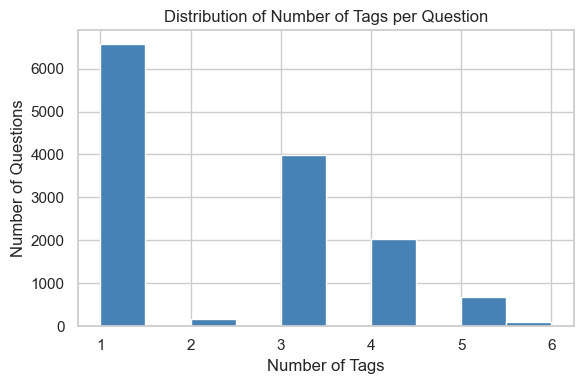

In [24]:
####维度一
# 1. 标签数量统计：每道题涉及的知识点数
questions_df['num_tags'] = questions_df['tags'].dropna().apply(lambda x: len(x.split()))
print("每道题标签数量统计（num_tags）已生成")

# 2. 是否是单标签题
questions_df['is_single_tag'] = questions_df['num_tags'] == 1
print("是否为单标签题（is_single_tag）已生成")

# 3. 课程粒度分析：每个 part 的题目平均标签数
part_tag_stats = questions_df.groupby('part')['num_tags'].mean().reset_index(name='avg_tags_per_part')
print("\n每个课程部分的平均标签数量：")
print(part_tag_stats)

# 可视化：标签数量分布直方图
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
questions_df['num_tags'].hist(bins=10, color='steelblue')
plt.title('Distribution of Number of Tags per Question')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Questions')
plt.tight_layout()
plt.show()


缺失 tags 的题目数量：1 / 13523
每道题对应的 bundle_size 特征已添加

各课程部分（part）中的标准答案分布：
correct_answer         0         1         2         3
part                                                  
1               0.260081  0.209677  0.298387  0.231855
2               0.343655  0.329083       NaN  0.327262
3               0.249040  0.253521  0.246479  0.250960
4               0.258513  0.256428  0.234190  0.250869
5               0.267465  0.263110  0.216658  0.252767
6               0.284653  0.227723  0.245875  0.241749
7               0.268966  0.204310  0.237069  0.289655


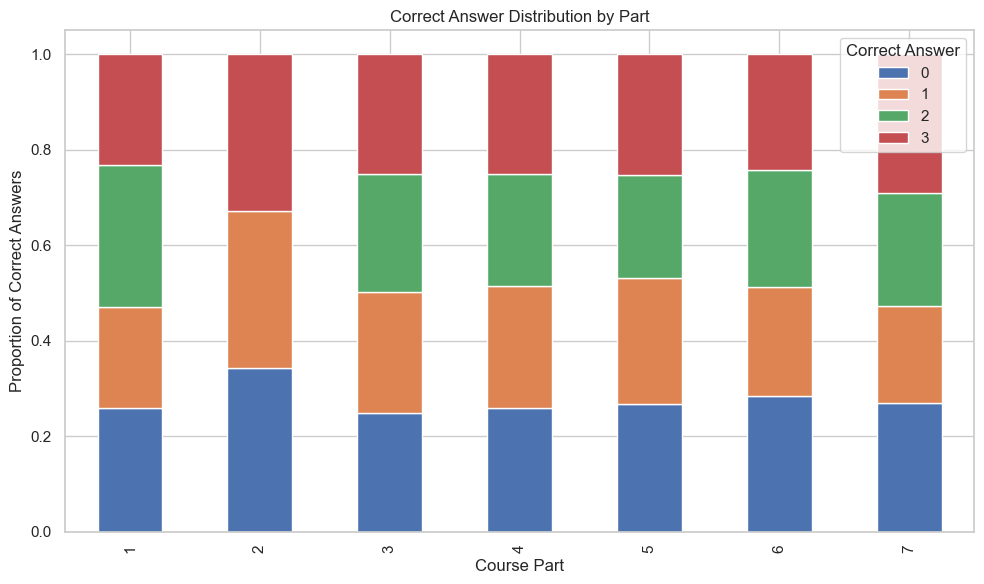

In [25]:
###维度二
# 1. 检查 tags 缺失情况
missing_tags_count = questions_df['tags'].isna().sum()
print(f"缺失 tags 的题目数量：{missing_tags_count} / {len(questions_df)}")

# 2. 检查每个 bundle 中的题目数量
bundle_size = questions_df.groupby('bundle_id').size()
questions_df['bundle_size'] = questions_df['bundle_id'].map(bundle_size)
print("每道题对应的 bundle_size 特征已添加")

# 3. 检查是否存在明显的 correct_answer 偏向
correct_answer_bias = questions_df.groupby('part')['correct_answer'].value_counts(normalize=True).unstack()
print("\n各课程部分（part）中的标准答案分布：")
print(correct_answer_bias)

# 可视化：每个 part 下 correct_answer 分布
correct_answer_bias.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Correct Answer Distribution by Part')
plt.xlabel('Course Part')
plt.ylabel('Proportion of Correct Answers')
plt.legend(title='Correct Answer')
plt.tight_layout()
plt.show()


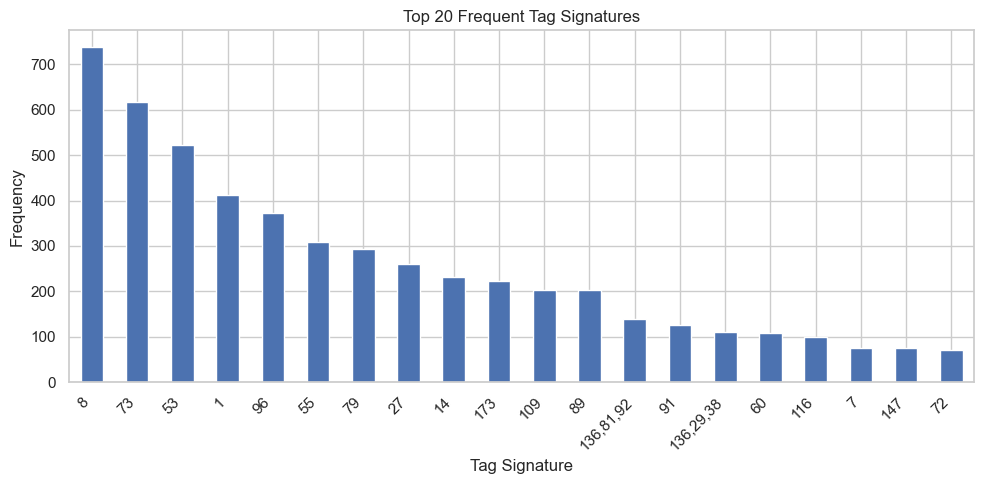

In [26]:
###维度三
# 1. 构造唯一标签组合的“题型签名”（用于分组/聚类）
questions_df['tag_signature'] = questions_df['tags'].dropna().apply(lambda x: ','.join(sorted(x.split())))

# 2. 构造该 tag_signature 出现的频率（可以当作一个“典型题型”数量）
signature_freq = questions_df['tag_signature'].value_counts()
questions_df['tag_signature_freq'] = questions_df['tag_signature'].map(signature_freq)

# 3. 可选：标签签名的哈希值（作为embedding标识符）
questions_df['tag_signature_hash'] = questions_df['tag_signature'].apply(lambda x: hash(x) if pd.notna(x) else None)

# 4. 可视化：典型题型的出现频率前20名
top_signatures = signature_freq.head(20)

plt.figure(figsize=(10,5))
top_signatures.plot(kind='bar')
plt.title('Top 20 Frequent Tag Signatures')
plt.xlabel('Tag Signature')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 1.3 exploring the example_test.csv

我们已经成功读取并分析了 `example_test.csv` 文件，以下是各项结果：

---

## 📄 文件基本信息预览

* **数据量**：104 条记录（样本较小，属于测试示例集）
* **字段数**：共 11 个字段
* **主要字段说明**：

| 字段名                              | 类型      | 含义简介                    |
| -------------------------------- | ------- | ----------------------- |
| `row_id`                         | int64   | 每条记录唯一ID                |
| `group_num`                      | int64   | 同组题目标识（一个 session 中的问题） |
| `timestamp`                      | int64   | 用户行为发生的时间戳              |
| `user_id`                        | int64   | 用户唯一标识                  |
| `content_id`                     | int64   | 内容唯一标识（题目或讲座）           |
| `content_type_id`                | int64   | 内容类型（0=题目，1=讲座）         |
| `task_container_id`              | int64   | 页面中题目的位置                |
| `prior_question_elapsed_time`    | float64 | 上一题花费的时间（ms）            |
| `prior_question_had_explanation` | object  | 上一题是否带有讲解               |
| `prior_group_answers_correct`    | object  | 上一组题是否答对（JSON格式）        |
| `prior_group_responses`          | object  | 上一组用户作答记录（JSON格式）       |

---

## 📉 缺失值分析结果（见上表）

| 字段                                                               | 缺失说明                                     |
| ---------------------------------------------------------------- | ---------------------------------------- |
| `prior_question_elapsed_time` 与 `prior_question_had_explanation` | 各缺失 1 条，可能为首条记录（无上一题）                    |
| `prior_group_answers_correct` 与 `prior_group_responses`          | 大部分缺失，仅在新 session 开始时才填充，默认用于对齐“上一题组的结果” |

---

## 🔍 可以探索的有效维度（并说明对建模的意义）

| 分析维度                 | 探索内容                                                   | 对建模/推荐的作用                      |
| -------------------- | ------------------------------------------------------ | ------------------------------ |
| 🧭 **时间戳结构**         | 用户行为的时间顺序、间隔时长分布                                       | 构建序列模型（LSTM/Transformer）时间感知机制 |
| 👤 **用户轨迹**          | 每个 `user_id` 的答题路径与题目变化                                | 个性化建模、知识追踪（KT）输入序列             |
| 📚 **内容类型分布**        | `content_type_id` 是否包含非题目（讲座）                          | 构建内容区分（推荐系统中题目 vs 讲座）          |
| ⏱️ **做题时间统计**        | `prior_question_elapsed_time` 分布特征                     | 可用作答题速度指标（能力/兴趣倾向）             |
| ✅ **上组答题正确率 / 回答内容** | `prior_group_answers_correct`, `prior_group_responses` | 用于预测当前组的表现、更新用户状态 embedding    |
| 🧪 **用户是否见过讲解内容**    | `prior_question_had_explanation`                       | 可作为“用户是否容易受益于解释”的重要特征          |




In [29]:
import pandas as pd

# 1. 读取数据（使用相对路径）
example_test_df = pd.read_csv('riiid-test-answer-prediction/example_test.csv')

# 2. 查看字段结构与数据类型
print("🔍 基本信息：")
print(example_test_df.info())

# 3. 显示前五行数据
print("\n📌 前五行数据：")
print(example_test_df.head())

# 4. 描述性统计（数值+类别）
print("\n📈 描述性统计：")
print(example_test_df.describe(include='all'))

# 5. 缺失值登记：数量 + 百分比
missing_count = example_test_df.isnull().sum()
missing_percent = (example_test_df.isnull().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percent
})

print("\n🚨 缺失值汇总表：")
print(missing_summary)


🔍 基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   row_id                          104 non-null    int64  
 1   group_num                       104 non-null    int64  
 2   timestamp                       104 non-null    int64  
 3   user_id                         104 non-null    int64  
 4   content_id                      104 non-null    int64  
 5   content_type_id                 104 non-null    int64  
 6   task_container_id               104 non-null    int64  
 7   prior_question_elapsed_time     103 non-null    float64
 8   prior_question_had_explanation  103 non-null    object 
 9   prior_group_answers_correct     4 non-null      object 
 10  prior_group_responses           4 non-null      object 
dtypes: float64(1), int64(7), object(3)
memory usage: 9.1+ KB
None

📌 前五行数据：
   row_id  group_

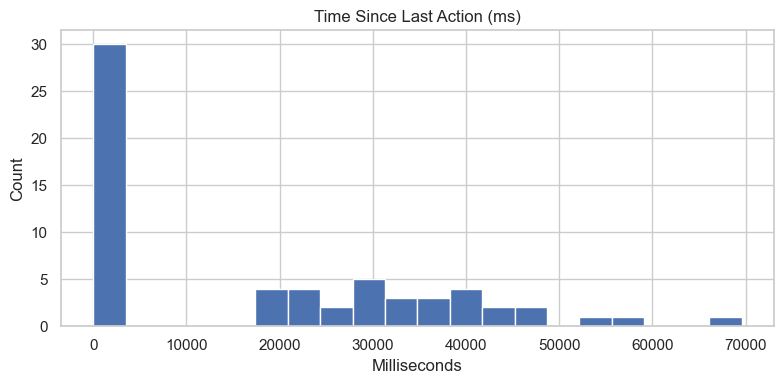

In [30]:
# 构造每个用户的时间戳差（下一题 - 当前题）
example_test_df = example_test_df.sort_values(by=['user_id', 'timestamp'])
example_test_df['time_since_last_action'] = example_test_df.groupby('user_id')['timestamp'].diff()

# 可视化时间间隔分布
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
example_test_df['time_since_last_action'].dropna().hist(bins=20)
plt.title('Time Since Last Action (ms)')
plt.xlabel('Milliseconds')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 💡 建模意义：
# 该特征可以作为序列模型中的时间感知维度，也能反映用户“活跃程度”或“答题节奏”。


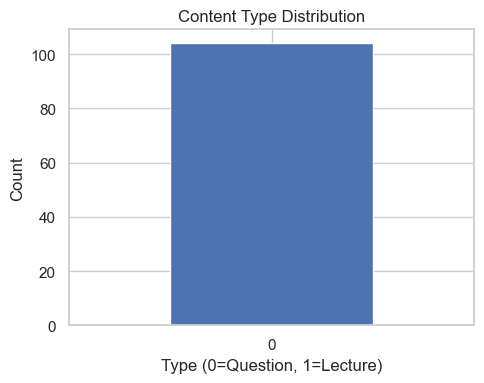

In [31]:
# content_type_id：0=题目，1=讲座
type_counts = example_test_df['content_type_id'].value_counts()

plt.figure(figsize=(5,4))
type_counts.plot(kind='bar')
plt.title('Content Type Distribution')
plt.xlabel('Type (0=Question, 1=Lecture)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 💡 建模意义：
# 讲座内容一般不用于预测，但可用于推荐系统（讲座推荐），也可排


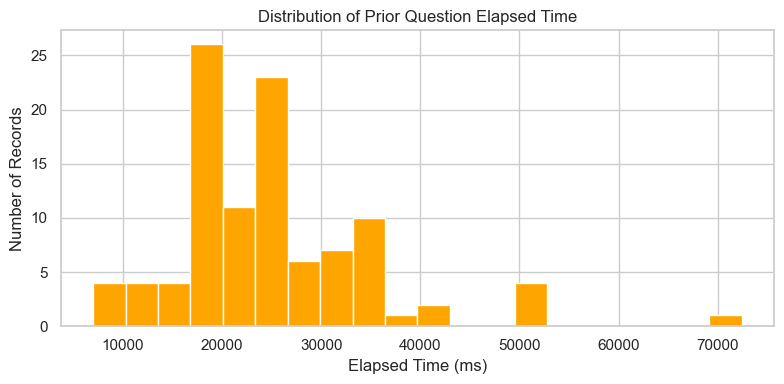

In [32]:
plt.figure(figsize=(8,4))
example_test_df['prior_question_elapsed_time'].dropna().hist(bins=20, color='orange')
plt.title('Distribution of Prior Question Elapsed Time')
plt.xlabel('Elapsed Time (ms)')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

# 💡 建模意义：
# 答题时间太短可能表示乱选，太长可能表示困难或分心，可构造“答题速度等级”特征。


In [33]:
# 查看非空记录的样例
print("🧾 prior_group_answers_correct 示例：")
print(example_test_df['prior_group_answers_correct'].dropna().head())

print("\n🧾 prior_group_responses 示例：")
print(example_test_df['prior_group_responses'].dropna().head())

# 💡 建模意义：
# 在 Transformer 或 RNN 模型中，可将这些字段编码成 mask，表示上一组用户是否答对，反映“短期知识状态”。


🧾 prior_group_answers_correct 示例：
0                                                    []
18    [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, ...
45    [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, ...
71    [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, ...
Name: prior_group_answers_correct, dtype: object

🧾 prior_group_responses 示例：
0                                                    []
18    [0, 0, 1, 1, 0, 1, 3, 3, 1, 1, 0, 3, 1, 2, 2, ...
45    [1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 3, 2, 0, 0, 3, ...
71    [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 3, 0, 0, ...
Name: prior_group_responses, dtype: object


## 1.4 exploring the example_sample_submission.csv



## 📄 一、数据结构总览

| 字段名                  | 类型      | 含义描述                 |
| -------------------- | ------- | -------------------- |
| `row_id`             | int64   | 与测试集一一对应的记录编号        |
| `answered_correctly` | float64 | 预测值（0\~1 之间，表示答对的概率） |
| `group_num`          | int64   | 同一组题的编号，通常对应一个页面题目组合 |

* **总记录数**：104 条
* **缺失值情况**：无任何缺失
* **字段数量**：3 个字段

---

## 🔍 二、该文件的作用与可探索维度

这份文件是标准 **Kaggle / Riiid 比赛的提交格式模板**，主要用于存储模型预测结果，因此数据本身不需深度探索，但有助于了解输出格式规范。

---

## ✅ 可做的有效探索（对建模输出有意义）

| 分析维度             | 可做探索                              | 对建模输出的作用             |
| ---------------- | --------------------------------- | -------------------- |
| 🎯 预测概率分布        | `answered_correctly` 分布是否合理（0\~1） | 判断模型是否过度置信（极端集中在0或1） |
| 🧮 group\_num 分布 | 每组是否均衡（是否存在组预测异常）                 | 检查模型是否受“组效应”干扰       |
| 🧾 row\_id 检查    | 与 test 集 row\_id 一致性验证            | 避免预测错行，影响提交评估        |



In [37]:
import pandas as pd

# 读取 sample submission 文件（使用相对路径）
submission_df = pd.read_csv('riiid-test-answer-prediction/example_sample_submission.csv')

# 数据结构与字段信息
print("🔍 数据结构总览：")
print(submission_df.info())

# 显示前几行数据
print("\n📌 前五行样例：")
print(submission_df.head())

# 描述性统计信息（包括 float 字段分布）
print("\n📈 描述性统计：")
print(submission_df.describe(include='all'))

# 缺失值统计
missing_count = submission_df.isnull().sum()
missing_percent = (submission_df.isnull().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percent
})

print("\n🚨 缺失值汇总：")
print(missing_summary)


🔍 数据结构总览：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   row_id              104 non-null    int64  
 1   answered_correctly  104 non-null    float64
 2   group_num           104 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.6 KB
None

📌 前五行样例：
   row_id  answered_correctly  group_num
0       0                 0.5          0
1       1                 0.5          0
2       2                 0.5          0
3       3                 0.5          0
4       4                 0.5          0

📈 描述性统计：
           row_id  answered_correctly   group_num
count  104.000000               104.0  104.000000
mean    53.480769                 0.5    1.711538
std     32.012734                 0.0    1.094320
min      0.000000                 0.5    0.000000
25%     25.750000                 0.5    1.000000
50%     53.500000   

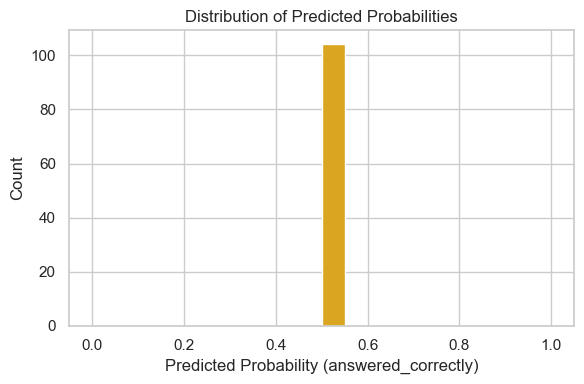

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
submission_df['answered_correctly'].hist(bins=20, color='goldenrod')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability (answered_correctly)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 💡 建模意义：
# 查看模型输出是否集中于 0 或 1，判断是否存在过拟合或置信度失衡问题。


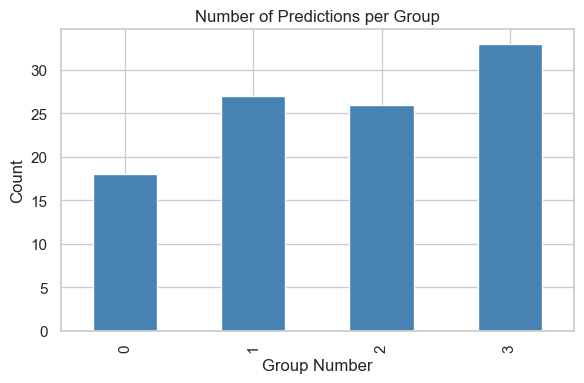

In [40]:
group_counts = submission_df['group_num'].value_counts().sort_index()

plt.figure(figsize=(6,4))
group_counts.plot(kind='bar', color='steelblue')
plt.title('Number of Predictions per Group')
plt.xlabel('Group Number')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 💡 建模意义：
# 分析是否存在某些 group 的样本量不合理，便于后续按组校正或 group-wise 模型预测。


In [41]:
# 示例：row_id 是否唯一、是否递增
print("row_id 是否唯一：", submission_df['row_id'].is_unique)
print("row_id 是否递增：", submission_df['row_id'].is_monotonic_increasing)
# 假设你加载了 test 数据：
test_df = pd.read_csv('riiid-test-answer-prediction/example_test.csv')
all(submission_df['row_id'].values == test_df['row_id'].values)


row_id 是否唯一： True
row_id 是否递增： True


True

## 1.5 exploring the train.csv

In [5]:
import pandas as pd

# 相对路径读取（本地或Kaggle Notebook中使用）
train_path = "riiid-test-answer-prediction/train.csv"

# 读取数据（large CSV 建议加 low_memory=False）
train = pd.read_csv(train_path, low_memory=False)

# 输出基础信息
print("📦 数据维度：", train.shape)
print("\n🧾 列信息：")
print(train.info())

# 显示前五行数据
print("\n📌 数据预览（前5行）：")
print(train.head())

# 基础统计信息
print("\n📊 描述性统计（数值列）：")
print(train.describe())


📦 数据维度： (101230332, 10)

🧾 列信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB
None

📌 数据预览（前5行）：
   row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692                0                  1   
1       1      56943      115        5716                0          

In [42]:
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('boolean')


| 字段名                              | 类型             | 含义               | 备注                        |
| -------------------------------- | -------------- | ---------------- | ------------------------- |
| `row_id`                         | int64          | 行编号              | 唯一ID                      |
| `timestamp`                      | int64          | 距离第一次活动的时间（毫秒）   | 用户时间线                     |
| `user_id`                        | int32          | 用户编号             | 可用于构建个性特征                 |
| `content_id`                     | int16          | 内容编号（题/讲座）       | 和 questions / lectures 联动 |
| `content_type_id`                | bool           | 是否是讲座（1为讲座，0为题目） | 🔁 与 lectures.csv 联动      |
| `task_container_id`              | int16          | 批次编号             | 多个题目组成一个批次                |
| `user_answer`                    | int8           | 用户作答（0\~3）       | 仅限题目（非讲座）                 |
| `answered_correctly`             | int8           | 是否答对（1为正确）       | -1 为讲座                    |
| `prior_question_elapsed_time`    | float32        | 上一批题的平均答题时长      | 时间信息                      |
| `prior_question_had_explanation` | ✅ boolean（优化后） | 上一批是否有讲解         | 与教学反馈效果相关                 |


/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_16298/553574153.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index.map({0: 'Question', 1: 'Lecture'}),


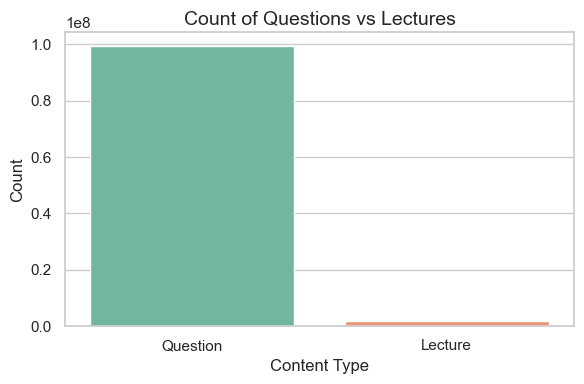

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
sns.set(style="whitegrid")

# 题目（0） vs 讲座（1）数量统计
type_counts = train['content_type_id'].value_counts().sort_index()

# 可视化
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index.map({0: 'Question', 1: 'Lecture'}),
            y=type_counts.values, palette="Set2")
plt.title("Count of Questions vs Lectures", fontsize=14)
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


📌 解读：

可以看出绝大多数记录是题目（content_type_id = 0），讲座数据量远小于题目，说明讲座在数据中是辅助性质。

In [44]:
# 只看题目行（非讲座）
questions_df = train[train['content_type_id'] == 0]

# prior_question_had_explanation 与 answered_correctly 的关系
explanation_effect = questions_df.groupby('prior_question_had_explanation')['answered_correctly'].agg(['mean', 'count']).reset_index()
explanation_effect.columns = ['Prior_Explanation', 'Correct_Rate', 'Count']
print(explanation_effect)


   Prior_Explanation  Correct_Rate     Count
0              False      0.500629   9193234
1               True      0.673189  89685560


📌 解读：

查看是否“上一个题组有讲解”会对当前题组正确率产生影响。
如果 Prior_Explanation == True 时 Correct_Rate 更高，说明反馈机制有效。

In [10]:
# 构造字段
train['Lecture'] = ((train['content_type_id'] == 1)).astype(int)
train['Wrong'] = ((train['content_type_id'] == 0) & (train['answered_correctly'] == 0)).astype(int)
train['Right'] = ((train['content_type_id'] == 0) & (train['answered_correctly'] == 1)).astype(int)

# 汇总每个任务批次
batch_lect = train.groupby("task_container_id")[['Lecture', 'Wrong', 'Right']].sum()

# 衍生特征
batch_lect['Percent_correct'] = batch_lect['Right'] / (batch_lect['Wrong'] + batch_lect['Right'])
batch_lect['Percent_lecture'] = batch_lect['Lecture'] / (batch_lect['Lecture'] + batch_lect['Wrong'] + batch_lect['Right'])

# 排序查看
batch_lect = batch_lect.sort_values(by="Percent_lecture", ascending=False)
batch_lect.head()


,Lecture,Wrong,Right,Percent_correct,Percent_lecture
task_container_id,,,,,
9096,8,57,191,0.770161,0.031250
270,2265,26105,52352,0.667270,0.028059
477,1428,16166,33427,0.674027,0.027988
253,2343,27380,54798,0.666821,0.027721
351,1835,21225,43158,0.670332,0.027711


📌 解读：

查看每个批次中讲座所占比例，以及是否能提升正确率。
Percent_lecture 越高的任务，可以观察是否 Percent_correct 也随之上升。

In [11]:
# 添加是否含讲座标记
batch_lect['Has_lecture'] = batch_lect['Lecture'] > 0

# 聚合分析
lecture_impact = batch_lect.groupby("Has_lecture")[['Wrong', 'Right']].sum()
lecture_impact['Percent_correct'] = lecture_impact['Right'] / (lecture_impact['Wrong'] + lecture_impact['Right'])

print(lecture_impact[['Percent_correct']])


             Percent_correct
Has_lecture                 
False               0.736412
True                0.657087


📌 解读：

分析含讲座与不含讲座的批次平均正确率差异。
如果含讲座批次正确率反而更低，说明仅依靠讲座可能效果有限或反向因果。

In [12]:
# 只保留做题记录（去除讲座）
question_data = train[train['content_type_id'] == 0]

# 每个用户答题数量
user_activity = question_data['user_id'].value_counts()

# 描述性统计
print(user_activity.describe())


count    393656.000000
mean        252.177790
std         734.721108
min           1.000000
25%          30.000000
50%          40.000000
75%         154.000000
max       17609.000000
Name: count, dtype: float64


📌 解释：这能帮助你识别活跃用户（答题多）与冷启动用户（答题少），可用于建模时调整样本权重。

In [13]:
# 每个用户的平均答题正确率
user_accuracy = question_data.groupby('user_id')['answered_correctly'].mean()

# 描述性统计
print(user_accuracy.describe())


count    393656.000000
mean          0.545183
std           0.163378
min           0.000000
25%           0.433333
50%           0.571429
75%           0.666667
max           1.000000
Name: answered_correctly, dtype: float64


📌 解释：构建用户能力画像，如低准确率用户可能更依赖讲座或反馈，能用于建模中“个性化特征”。

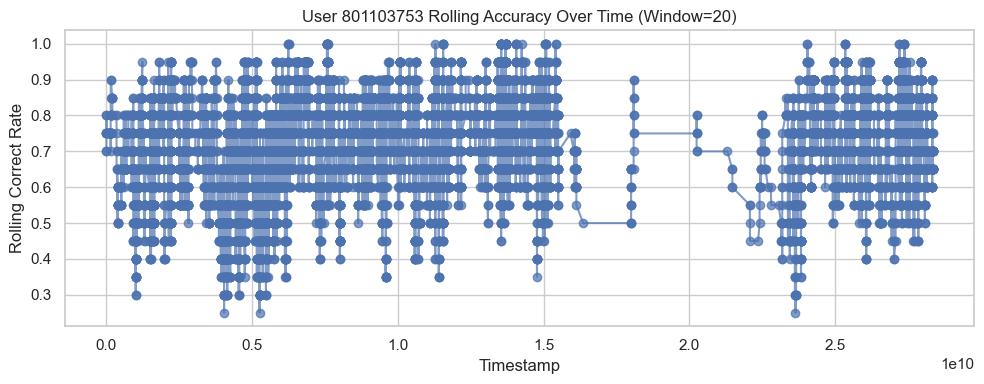

In [14]:
# 找出最活跃的用户
top_user_id = user_activity.idxmax()

# 获取该用户完整做题时间序列
top_user_df = question_data[question_data['user_id'] == top_user_id].sort_values(by='timestamp')

# 计算滑动正确率（窗口为20）
top_user_df['rolling_accuracy'] = top_user_df['answered_correctly'].rolling(window=20).mean()

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 4))
plt.plot(top_user_df['timestamp'], top_user_df['rolling_accuracy'], marker='o', linestyle='-', alpha=0.7)
plt.title(f"User {top_user_id} Rolling Accuracy Over Time (Window=20)")
plt.xlabel("Timestamp")
plt.ylabel("Rolling Correct Rate")
plt.tight_layout()
plt.show()


📌 解释：判断用户是否存在“答题疲劳”或“能力提升”，可为时序模型（如 LSTM、Transformer）提供先验判断
你上传的图像展示了用户 `801103753` 的**滚动正确率随时间的变化**，这是使用窗口大小为 20 的滑动平均（`rolling(window=20)`）生成的。以下是对这张图的详细分析：

---

## 🧠 图像解读

### 横轴（X-axis）：`timestamp`

* 表示用户在平台上的答题时间进程（单位：毫秒，非绝对时间）
* 越往右说明越晚进行的答题

### 纵轴（Y-axis）：`Rolling Correct Rate`

* 该用户最近 20 次答题的平均正确率
* 用于平滑掉个别题目的波动，呈现用户整体答题水平趋势

---

## 📊 行为趋势观察

### 🔹 1. 左侧（前期阶段）

* 滚动正确率稳定在 **0.6\~0.9 之间**
* 高密度分布说明：用户答题密集、状态稳定，准确率较好

### 🔹 2. 中段（timestamp ≈ 1.5e10）

* 出现显著**答题数量下降**，点的密度大幅变稀
* 滚动正确率也有下降趋势，甚至一度降到 0.4 以下
* **可能性分析：**

  * 用户休息一段时间再次回来（中断）
  * 用户进入更难的部分 or 心理疲劳/失误增加

### 🔹 3. 后期（右侧 timestamp ≈ 2.5e10）

* 用户再次答题密集，但准确率波动较大
* 有一段时间处于低谷（约 0.3\~0.5），后略有回升
* **猜测：** 用户仍处于“适应或过渡期”，但整体能力下滑或信心受挫

---

## 📌 小结分析

| 阶段 | 表现         | 可能解释            |
| -- | ---------- | --------------- |
| 初期 | 准确率高、答题密集  | 学习热情高，题目简单      |
| 中期 | 准确率下降，答题减少 | 疲劳、难度提升、兴趣减退    |
| 后期 | 正确率波动，节奏恢复 | 用户尝试恢复节奏，但效果不稳定 |

---

## 💡 建议用法（建模或产品层面）：

1. **构建时间序列特征**：加入每个用户的答题序号、rolling\_accuracy、答题节奏等
2. **检测用户疲劳期**：在低滚动正确率时发送提示或推荐讲座
3. **用作个性化模型微调依据**：将 early、middle、late behavior 分阶段建模

---

是否你还想看其他用户的 rolling accuracy 或探索整体趋势的可视化（例如 boxplot）？
我也可以帮你从上万个用户中聚合出“高绩效 vs 低绩效用户”的行为模式对比。是否继续？


/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_16298/3196049311.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  user_df['rolling_accuracy'] = user_df['rolling_accuracy'].fillna(method='bfill')
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_16298/3196049311.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  user_df['rolling_accuracy'] = user_df['rolling_accuracy'].fillna(method='bfill')
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_16298/3196049311.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  user_df['rolling_accuracy'] = user_df['rolling_accuracy'].fillna(method='bfill')
/var/folders/qv/vr5nbq_n1yg_gzj82zd6psl80000gn/T/ipykernel_16298/3196049311.py:19: FutureWarning: Serie

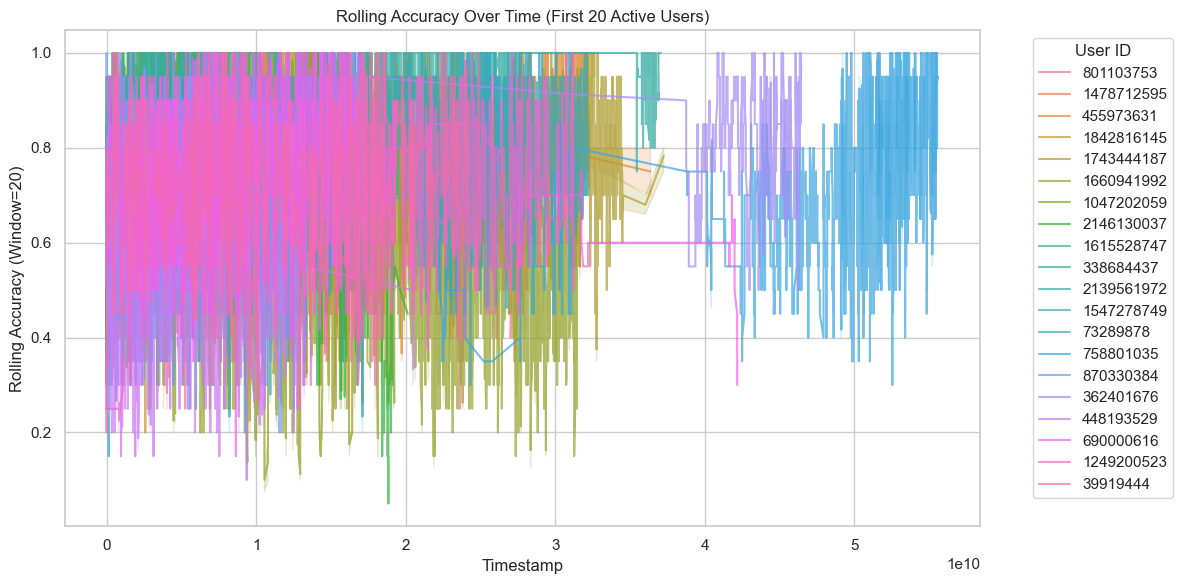

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 只保留题目数据
question_df = train[train['content_type_id'] == 0]

# 选择答题量较多的前 20 个用户
user_counts = question_df['user_id'].value_counts()
active_users = user_counts[user_counts >= 50].index[:20]

# 计算每个用户的 rolling accuracy
rolling_data = []

for user_id in active_users:
    user_df = question_df[question_df['user_id'] == user_id].sort_values('timestamp')
    user_df['rolling_accuracy'] = user_df['answered_correctly'].rolling(window=20).mean()
    user_df['rolling_accuracy'] = user_df['rolling_accuracy'].fillna(method='bfill')
    user_df['user_id'] = str(user_id)
    rolling_data.append(user_df[['timestamp', 'rolling_accuracy', 'user_id']])

# 合并所有数据
all_rolling_df = pd.concat(rolling_data)

# 绘图
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_rolling_df, x='timestamp', y='rolling_accuracy', hue='user_id', alpha=0.7)
plt.title("Rolling Accuracy Over Time (First 20 Active Users)")
plt.xlabel("Timestamp")
plt.ylabel("Rolling Accuracy (Window=20)")
plt.legend(title="User ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


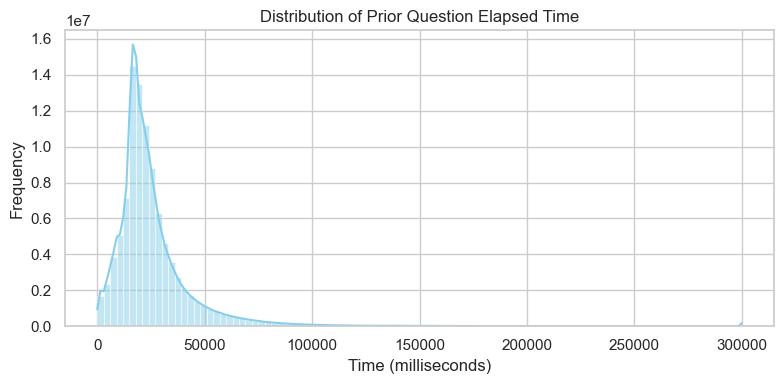

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置样式
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.histplot(train[train['content_type_id'] == 0]['prior_question_elapsed_time'].dropna(),
             bins=100, kde=True, color='skyblue')
plt.title("Distribution of Prior Question Elapsed Time")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### 与其他文件联动的“联合探索机会”
| 文件                              | 关联字段                                        | 联动作用                    |
| ------------------------------- | ------------------------------------------- | ----------------------- |
| `questions.csv`                 | `content_id`, `part`, `tags`                | 获取题目的知识点、所属课程模块等，构建题目画像 |
| `lectures.csv`                  | `content_id` (where `content_type_id == 1`) | 对应的讲座内容类型、标签，用于建模讲座学习行为 |
| `example_test.csv`              | 模拟真实预测场景（结构一致）                              | 校验特征设计是否泛化到未来用户数据       |
| `example_sample_submission.csv` | `row_id`                                    | 输出预测值，需与测试结构对齐          |


In [47]:
# 加载 questions.csv
questions_df = pd.read_csv('riiid-test-answer-prediction/questions.csv')

# 选择需要的字段
questions_df = questions_df[['question_id', 'part', 'tags']]
questions_df.rename(columns={'question_id': 'content_id'}, inplace=True)

# 将 questions.csv 合并进 train
train = train.merge(questions_df, on='content_id', how='left')

# 💡 构建特征示例：
# - part: 表示课程模块（可做 embedding）
# - tags: 可统计掌握率、难度、个性化推荐用


In [48]:
# 加载 lectures.csv
lectures_df = pd.read_csv('riiid-test-answer-prediction/lectures.csv')

# 提取所有 lecture 的 content_id（等于 lecture_id）
lecture_content_ids = lectures_df['lecture_id'].unique()

# 添加是否是讲座的标记
train['is_lecture'] = train['content_id'].isin(lecture_content_ids)

# 💡 用法建议：
# - 统计每位用户观看讲座比例
# - 构建用户偏好（type_of 分布）


In [49]:
# 加载 example_test.csv
example_test = pd.read_csv('riiid-test-answer-prediction/example_test.csv')

# 校验字段一致性
train_columns = set(train.columns) - {'answered_correctly'}
test_columns = set(example_test.columns)

missing_in_test = train_columns - test_columns
print("训练集中的字段但测试集中缺失：", missing_in_test)

# 💡 用于测试时避免使用未来信息、保持特征一致性


训练集中的字段但测试集中缺失： {'Wrong', 'user_answer', 'tags', 'is_lecture', 'Lecture', 'Right', 'part'}


In [50]:
# 加载提交模板
submission = pd.read_csv('riiid-test-answer-prediction/example_sample_submission.csv')

# 校验 row_id 对应一致
print("测试集与提交文件长度一致：", len(submission) == len(example_test))
print("row_id 是否严格对应：", all(submission['row_id'] == example_test['row_id']))

# 💡 确保最终模型预测输出不会错位（避免提交错误）


测试集与提交文件长度一致： True
row_id 是否严格对应： True


🌈 一、全局结构类可视化（overview insights）

1. 📊 各课程模块（part）中的题目数量 vs 讲座数量柱状对比图

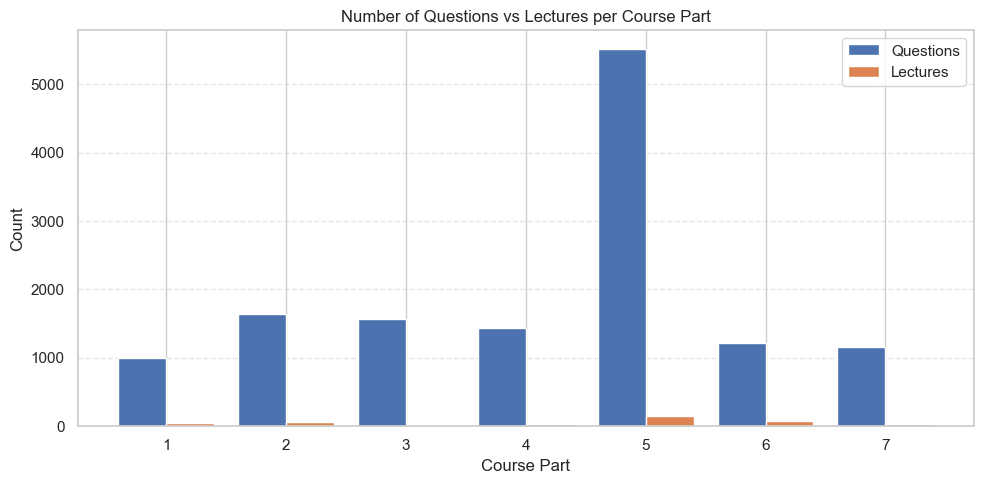

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
questions = pd.read_csv('riiid-test-answer-prediction/questions.csv')
lectures = pd.read_csv('riiid-test-answer-prediction/lectures.csv')

# 汇总
q_part_counts = questions['part'].value_counts().sort_index()
l_part_counts = lectures['part'].value_counts().sort_index()

# 可视化
plt.figure(figsize=(10,5))
plt.bar(q_part_counts.index - 0.2, q_part_counts.values, width=0.4, label='Questions')
plt.bar(l_part_counts.index + 0.2, l_part_counts.values, width=0.4, label='Lectures')
plt.xlabel('Course Part')
plt.ylabel('Count')
plt.title('Number of Questions vs Lectures per Course Part')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🌠 二、用户行为节奏可视化（轨迹、热力图）

2. ⏱ 用户答题节奏：答题时间间隔分布直方图 + log 坐标变换

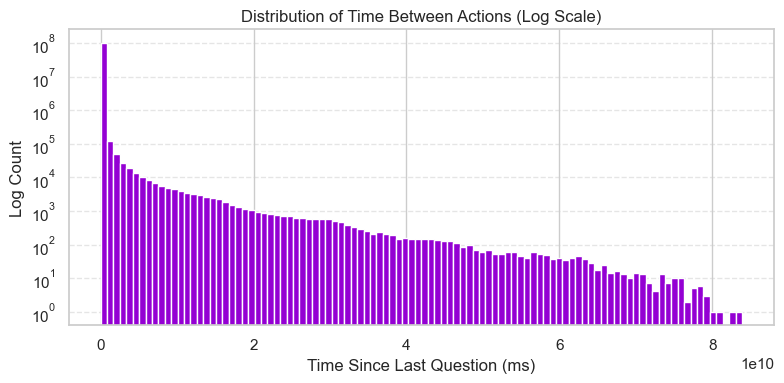

In [52]:
import numpy as np

train = train.sort_values(['user_id', 'timestamp'])
train['time_since_last'] = train.groupby('user_id')['timestamp'].diff()

plt.figure(figsize=(8,4))
plt.hist(train['time_since_last'].dropna(), bins=100, color='darkviolet', log=True)
plt.title('Distribution of Time Between Actions (Log Scale)')
plt.xlabel('Time Since Last Question (ms)')
plt.ylabel('Log Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
